#INTRODUCTION
If we want to start the analysis about the demand of the bikes we have to insert the data files data.csv



In [ ]:
#reading the csv file
import pandas as pd
data = pd.read_csv("/content/data.csv")

we will print our data

In [ ]:
data

,TripId,StartTime,EndTime,StartStationId,EndStationId
0,2616540,2023-02-01 00:28:04,2023-02-01 00:45:18,1,0
1,2616644,2023-02-01 00:34:08,2023-02-01 00:45:49,1,0
2,2616730,2023-02-01 00:39:18,2023-02-01 00:52:06,1,0
3,2617099,2023-02-01 00:59:02,2023-02-01 01:08:31,0,1
4,2617103,2023-02-01 00:59:35,2023-02-01 01:08:19,0,1
...,...,...,...,...,...
8631,3988772,2023-02-28 23:29:08,2023-02-28 23:33:32,1,0
8632,3988863,2023-02-28 23:33:01,2023-02-28 23:36:30,0,1
8633,3988901,2023-02-28 23:35:32,2023-02-28 23:40:22,1,0
8634,3988930,2023-02-28 23:36:58,2023-02-28 23:45:17,0,1


**We will check if the csv file has any missing values or any duplicate values**

In [ ]:
#checking for any missing values in the columns
data.isnull().any()

TripId            False
StartTime         False
EndTime           False
StartStationId    False
EndStationId      False
dtype: bool

as we can see we dont have any missing values but if we want to be more precise

In [ ]:
#checking for any missing values
#if we have at least one missing value it will print ΤRUE
#otherwise it will print False
data.isnull().sum().any()

False

Now we will check for any duplicate values

In [ ]:
#checking for any duplicate values
#if we have at least one it will print True
#otherwise it will print False
data.duplicated().sum().any()

False

Now we can continue the analysis , because we dont have any missing or duplicate values

If we want to do resample we have to make the columns(StarTime,EndTime) a DateTimeIndex


In [ ]:
#conversion to DatetimeIndex
data["StartTimefixed"] = pd.DatetimeIndex(data.StartTime)
#concat the data to the other columns
data = data.set_index(data["StartTimefixed"])
#we remove the StartTime column
data = data.drop('StartTime',axis = 1)
data

,TripId,EndTime,StartStationId,EndStationId,StartTimefixed
StartTimefixed,,,,,
2023-02-01 00:28:04,2616540,2023-02-01 00:45:18,1,0,2023-02-01 00:28:04
2023-02-01 00:34:08,2616644,2023-02-01 00:45:49,1,0,2023-02-01 00:34:08
2023-02-01 00:39:18,2616730,2023-02-01 00:52:06,1,0,2023-02-01 00:39:18
2023-02-01 00:59:02,2617099,2023-02-01 01:08:31,0,1,2023-02-01 00:59:02
2023-02-01 00:59:35,2617103,2023-02-01 01:08:19,0,1,2023-02-01 00:59:35
...,...,...,...,...,...
2023-02-28 23:29:08,3988772,2023-02-28 23:33:32,1,0,2023-02-28 23:29:08
2023-02-28 23:33:01,3988863,2023-02-28 23:36:30,0,1,2023-02-28 23:33:01
2023-02-28 23:35:32,3988901,2023-02-28 23:40:22,1,0,2023-02-28 23:35:32


In [ ]:
#We put a period so that we can calculate the bikes that have been taken from the station for every T
T='2H'
taken = data['StartStationId'].resample(T).sum()
taken

StartTimefixed
2023-02-01 00:00:00     4
2023-02-01 02:00:00     1
2023-02-01 04:00:00     0
2023-02-01 06:00:00    18
2023-02-01 08:00:00    37
                       ..
2023-02-28 14:00:00    14
2023-02-28 16:00:00    25
2023-02-28 18:00:00    28
2023-02-28 20:00:00    14
2023-02-28 22:00:00     8
Freq: 2H, Name: StartStationId, Length: 336, dtype: int64

In [ ]:
#conversion to DatetimeIndex
data["EndTimefixed"] = pd.DatetimeIndex(data.EndTime)
#concat the data to the other columns
data = data.set_index(data["EndTimefixed"])
#we remove the EndTime column
data = data.drop('EndTime',axis = 1)
data

,TripId,StartStationId,EndStationId,StartTimefixed,EndTimefixed
EndTimefixed,,,,,
2023-02-01 00:45:18,2616540,1,0,2023-02-01 00:28:04,2023-02-01 00:45:18
2023-02-01 00:45:49,2616644,1,0,2023-02-01 00:34:08,2023-02-01 00:45:49
2023-02-01 00:52:06,2616730,1,0,2023-02-01 00:39:18,2023-02-01 00:52:06
2023-02-01 01:08:31,2617099,0,1,2023-02-01 00:59:02,2023-02-01 01:08:31
2023-02-01 01:08:19,2617103,0,1,2023-02-01 00:59:35,2023-02-01 01:08:19
...,...,...,...,...,...
2023-02-28 23:33:32,3988772,1,0,2023-02-28 23:29:08,2023-02-28 23:33:32
2023-02-28 23:36:30,3988863,0,1,2023-02-28 23:33:01,2023-02-28 23:36:30
2023-02-28 23:40:22,3988901,1,0,2023-02-28 23:35:32,2023-02-28 23:40:22


In [ ]:
#We put a period so that we can calculate the bikes that have been returned to the station for every T
T = '2H'
returned = data['EndStationId'].resample(T).sum()
returned

EndTimefixed
2023-02-01 00:00:00     3
2023-02-01 02:00:00     1
2023-02-01 04:00:00     1
2023-02-01 06:00:00     8
2023-02-01 08:00:00    30
                       ..
2023-02-28 16:00:00    33
2023-02-28 18:00:00    34
2023-02-28 20:00:00    18
2023-02-28 22:00:00    18
2023-03-01 00:00:00     0
Freq: 2H, Name: EndStationId, Length: 337, dtype: int64

we will create a column with which to calculate the demand for
bicycles at the station, i.e. the number of bicycles delivered to the station minus the
number of bicycles taken from the station within the interval T

In [ ]:
#we introduce a new column with the demand for the bikes at the station
# i.e. the number of bicycles delivered to the station minus the number of bicycles taken from the station within the interval T
demand_series = returned-taken

#print the demand_series
demand_series


2023-02-01 00:00:00    -1.0
2023-02-01 02:00:00     0.0
2023-02-01 04:00:00     1.0
2023-02-01 06:00:00   -10.0
2023-02-01 08:00:00    -7.0
                       ... 
2023-02-28 16:00:00     8.0
2023-02-28 18:00:00     6.0
2023-02-28 20:00:00     4.0
2023-02-28 22:00:00    10.0
2023-03-01 00:00:00     NaN
Freq: 2H, Length: 337, dtype: float64

as we can see , after the creation of the demand_series we can see that we have a null value , so we will check how many missing values do we have

In [ ]:
demand_series.isnull().sum()

1

Since we only have 1 null value and since this null value is in the month of March we will delete it (we are interested in the month of February)

In [ ]:
demand_series = demand_series.dropna()

we will plot the Demand series after we removed the missing values

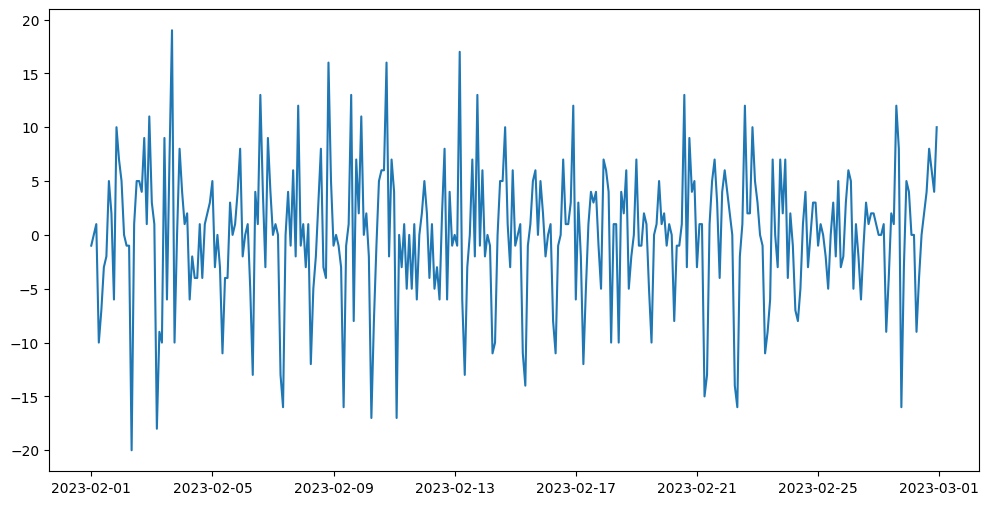

In [ ]:
import matplotlib.pyplot as plt
#plot το demand series
plt.figure(figsize=(12,6))
plt.plot(demand_series.index,demand_series)
plt.show()

now we will plot our data to see if we have any trend or seasonality

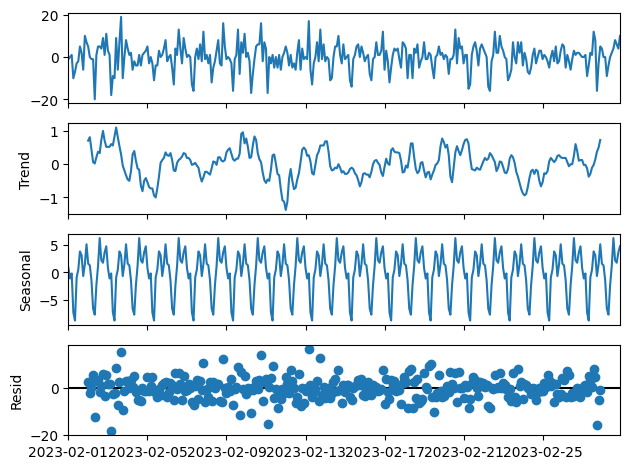

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(demand_series, model='additive')
result.plot()
plt.show()

In the graph above, we get 4 subgraphs:

1. The time series we gave.
2. The terms of the trend.
3. The terms of seasonality.
4. The residuals.


we notice that our data appears to have some kind of seasonality, so we will use models that are used to handle seasonality in the data.

before we deal with this we will split the data to training data and test data

In [ ]:
#from the sklearn documentation so that we can split the data
from sklearn.model_selection import train_test_split

#we will split the data to training data(80%) and test data(20%)
training_data , test_data =  train_test_split(demand_series,test_size = 0.2 , shuffle = False)

#we will print the length of the training & test data
print(len(training_data))
print(len(test_data))


268
68


#We are doing a Normality Check of our data

1. ADF: null hypothesis if our data is not normal
2. p-value: if it is below (p<0.05) we reject the null hypothesis and conclude that our data is normal!

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#checking for stationarity series
result = adfuller(training_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# if it is not stationary the we do differentiation
if result[1] > 0.05:
    training_data = training_data.diff()
else:
  print("The data are stationary")


ADF Statistic: -6.436108
p-value: 0.000000
The data are stationary



Since we now have our data ready we will import 3 libraries for the following models

# 1. Exponential Smoothing







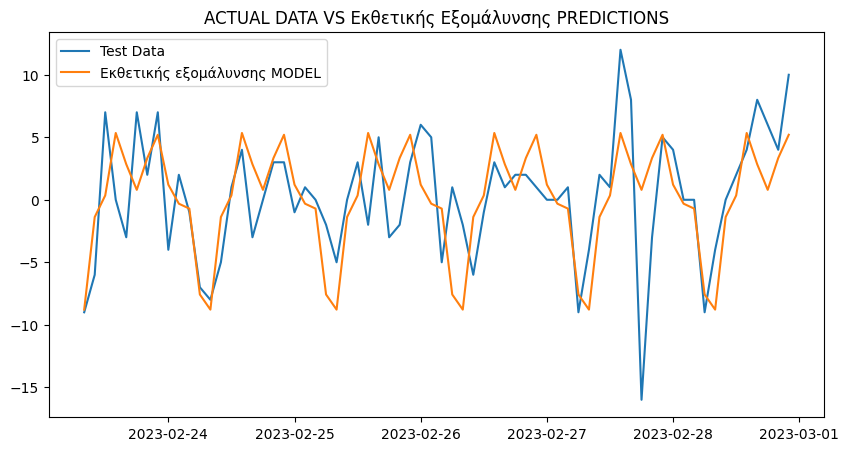

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
#creation of exponential smoothing
seasonal_period = int(pd.Timedelta('1D') / pd.Timedelta(T))  # daily seasonality

exp_smoth_model = ExponentialSmoothing(training_data,seasonal='add',seasonal_periods = seasonal_period).fit(smoothing_level=0.2,optimized= True)
exp_smoth_pred =  exp_smoth_model.predict(start = len(training_data), end = len(training_data)+len(test_data)-1)

#plot test data and ses model
plt.figure(figsize=(10,5))

plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,exp_smoth_pred,label = 'Εκθετικής εξομάλυνσης MODEL')
plt.legend()
plt.title("ACTUAL DATA VS Εκθετικής Εξομάλυνσης PREDICTIONS")
plt.show()


We will evaluate the performance of exponential smoothing

MEASUREMENTS USED:
1. MSE (MEAN SQUARED ERROR)
2. RMSE (ROOT MEAN SQUARED ERROR)
3. MAE (MEAN ABSOLUTE ERROR)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

#calculating mse,mae,rsme for ses model
exp_smoth_mse = mean_squared_error(test_data,exp_smoth_pred)
exp_smoth_mae = mean_absolute_error(test_data,exp_smoth_pred)
exp_smoth_rmse = np.sqrt(exp_smoth_mse)

print("Εκθετικής Εξομάλυνσης MSE: %f" % exp_smoth_mse)
print("Εκθετικής Εξομάλυνσης MAE: %f" % exp_smoth_mae)
print("Εκθετικής Εξομάλυνσης RMSE: %f"% exp_smoth_rmse)

Εκθετικής Εξομάλυνσης MSE: 17.968818
Εκθετικής Εξομάλυνσης MAE: 3.234593
Εκθετικής Εξομάλυνσης RMSE: 4.238964


#2.SARIMA MODEL

we will plot the correlation and partial correlation diagrams

to find the appropriate metrics (p,d,q) for the SARIMA model

* p = order of the autoregressive part
* d = order of first differences
* q = order of part of the moving medium

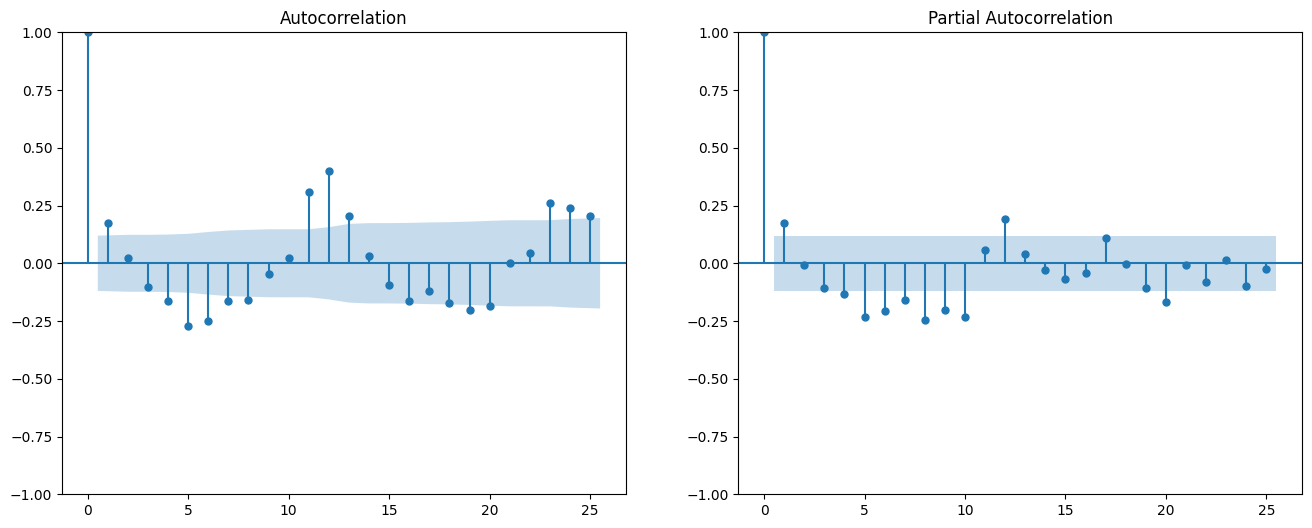

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Εμφάνιση των διαγραμμάτων ACF και PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(training_data, ax=axes[0])
plot_pacf(training_data, ax=axes[1])
plt.show()


it was observed from the above diagram that the better measurements will be
p = 1, d = 0 , q =1






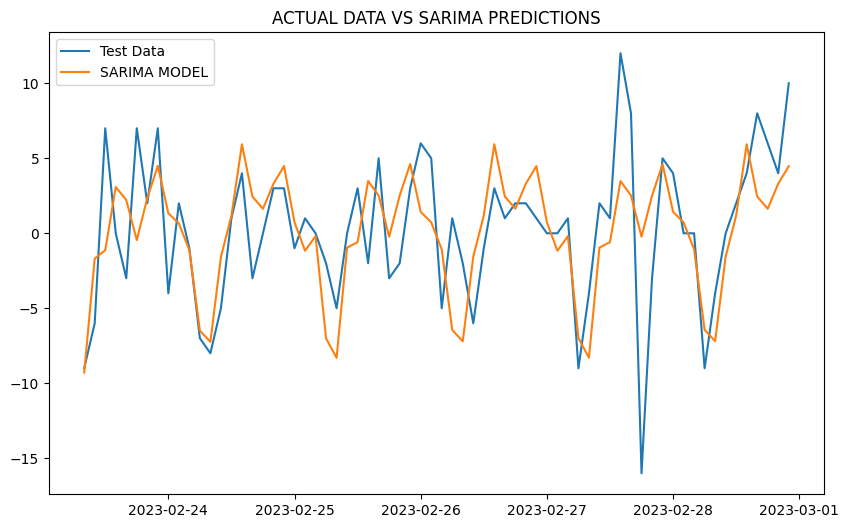

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA parameterization based on ACF/PACF analysis
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1
s = 24  # seasonality for 24 hours
# training of sarima model
sarima_model = SARIMAX(training_data, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()

# prediction model
sarima_predictions = sarima_model.predict(start=len(training_data), end=len(training_data) + len(test_data) - 1)

# plot the test data and sarima prediction data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, sarima_predictions, label='SARIMA MODEL')
plt.legend()
plt.title("ACTUAL DATA VS SARIMA PREDICTIONS")
plt.show()


Now we will evaluate the performance of the ARIMA MODEL


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#υπολογισμος mse,mae,rmse for arima model
mse_sarima = mean_squared_error(test_data,sarima_predictions)
mae_sarima = mean_absolute_error(test_data,sarima_predictions)
rmse_sarima = np.sqrt(mse_sarima)
print("SARIMA MSE: %f"% mse_sarima)
print("SARIMA MAE: %f"% mae_sarima)
print("SARIMA RMSE: %f"% rmse_sarima)

SARIMA MSE: 16.277944
SARIMA MAE: 3.078661
SARIMA RMSE: 4.034593


# AR MODEL

To find the appropriate lag for the AR MODEL We need to find the AIC with the smallest value

In [ ]:
from statsmodels.tsa.ar_model import AutoReg as AR
import numpy as np

#minimum aic -> best lag
aic_values = []
for lag in range(1, 13):
    model = AR(training_data, lags=lag).fit()
    aic_values.append(model.aic)

best_lag = np.argmin(aic_values) + 1
print(f"Best lag length based on AIC: {best_lag}")

Best lag length based on AIC: 12


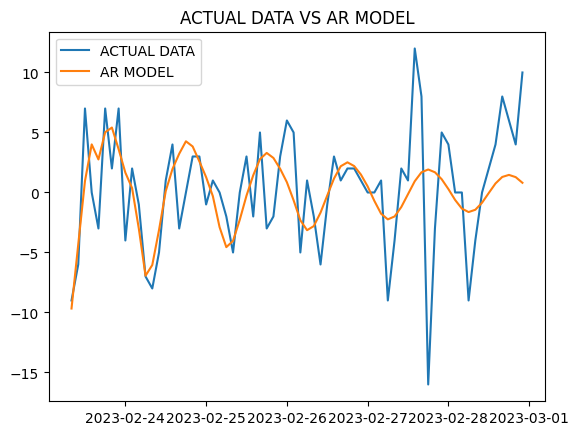

In [ ]:



#we put the best lag
best_model = AR(training_data, lags=best_lag).fit()
ar_1_model = best_model
ar_1_pred = ar_1_model.predict(start =len(training_data), end = len(training_data)+len(test_data)-1,dynamic = False)

#plot ar_model and test data
plt.plot(test_data.index,test_data,label="ACTUAL DATA")
plt.plot(test_data.index,ar_1_pred,label= "AR MODEL")
plt.title("ACTUAL DATA VS AR MODEL")
plt.legend()
plt.show()


WE WILL CALCULATE RMSE,MAE,MSE

In [ ]:

#calculation of rmse, mse, mae of the ar model
mse_ar_1 = mean_squared_error(test_data,ar_1_pred)
mae_ar_1 = mean_absolute_error(test_data,ar_1_pred)
rmse_ar_1 = np.sqrt(mse_ar_1)


#print our data
print("AR1 MSE: %f " % mse_ar_1)
print("AR1 MAE: %f" % mae_ar_1)
print("AR1 RMSE: %f" % rmse_ar_1)



AR1 MSE: 19.005746 
AR1 MAE: 3.261418
AR1 RMSE: 4.359558


#PLOTS THOSE 3 MODELS

In [ ]:
import matplotlib.pyplot as plt
#we will compare each model separately with another
fig , ax = plt.subplots(3,1,figsize = (10,10))

ax= ax.flatten()



#ar model vs arima model
ax[0].plot(test_data.index,ar_1_pred,label = "AR1")
ax[0].plot(test_data.index,sarima_predictions , label = "SARIMA MODEL")
ax[0].legend()
ax[0].set_title("AR1 VS SARIMA")


#ar model vs ses model
ax[1].plot(test_data.index,ar_1_pred, label = 'AR1')
ax[1].plot(test_data.index,exp_smoth_pred,label ="Εκθετικής Εξομάλυνσης")
ax[1].legend()
ax[1].set_title("AR1 VS Εκθετικής Εξομάλυνσης")


#arima model vs ses model
ax[2].plot(test_data.index,exp_smoth_pred,label ="Εκθετικής Εξομάλυνσης")
ax[2].plot(test_data.index,sarima_predictions , label = "SARIMA MODEL")
ax[2].legend()
ax[2].set_title("Εκθετικής Εξομάλυνσης VS SARIMA")

# we use it to make the xlabels in the suplots more uniform
for axis in ax:
   for labels in axis.get_xticklabels():
    labels.set_rotation(45)

#modifing the layouts
plt.tight_layout()
plt.show()



#we compare all of them together
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, ar_1_pred, label='AR1')
plt.plot(test_data.index, exp_smoth_pred, label='Εκθετικής Εξομάλυνσης')
plt.plot(test_data.index, sarima_predictions, label='SARIMA MODEL')
plt.legend()
plt.title('All Models Comparison')
plt.show()


#NOW WE WILL DO FOR T=1H

In [ ]:
T = '1H'

#assign the results per period T to a new variable for the bikes they get
taken = data['StartStationId'].resample(T).sum()
taken

EndTimefixed
2023-02-01 00:00:00    3
2023-02-01 01:00:00    0
2023-02-01 02:00:00    0
2023-02-01 03:00:00    1
2023-02-01 04:00:00    0
                      ..
2023-02-28 20:00:00    9
2023-02-28 21:00:00    7
2023-02-28 22:00:00    2
2023-02-28 23:00:00    5
2023-03-01 00:00:00    1
Freq: H, Name: StartStationId, Length: 673, dtype: int64

In [ ]:
T = '1H'
returned = data['EndStationId'].resample(T).sum()
returned

EndTimefixed
2023-02-01 00:00:00    0
2023-02-01 01:00:00    3
2023-02-01 02:00:00    1
2023-02-01 03:00:00    0
2023-02-01 04:00:00    0
                      ..
2023-02-28 20:00:00    9
2023-02-28 21:00:00    9
2023-02-28 22:00:00    9
2023-02-28 23:00:00    9
2023-03-01 00:00:00    0
Freq: H, Name: EndStationId, Length: 673, dtype: int64

In [ ]:
demand_series = returned - taken

In [ ]:
demand_series.isnull().sum()

0


since we have no missing values ​​we will continue the process with the steps we took for T=2H


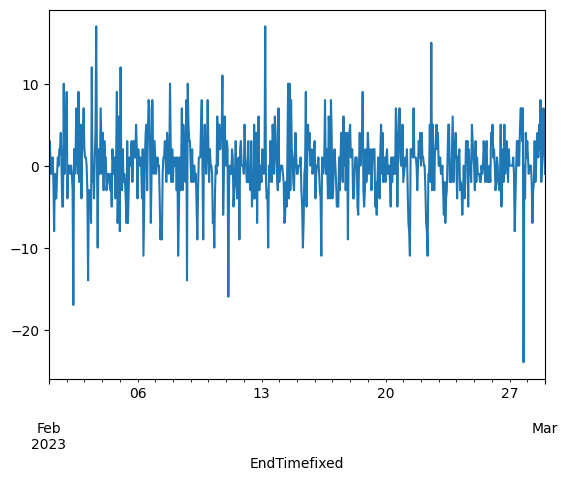

In [ ]:
import matplotlib.pyplot as plt



#plot το demand_series
demand_series.plot()
plt.show()

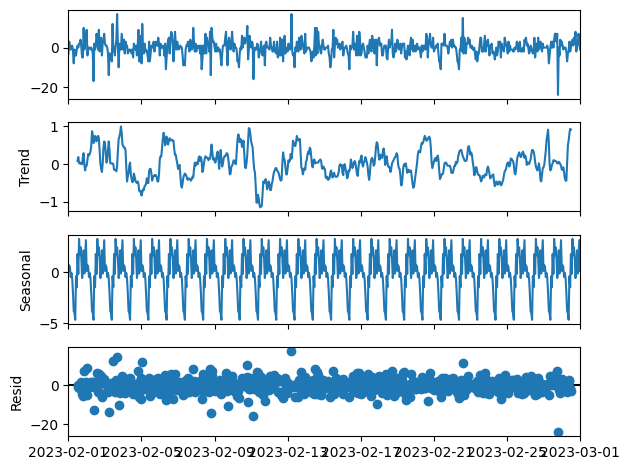

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(demand_series, model='additive')
result.plot()
plt.show()

**We will split our data into training data & test data (80,20)**

In [ ]:
# to split our data into training data & test data
from sklearn.model_selection import train_test_split

#we will split demand_series data into training_data & test data
training_data , test_data =  train_test_split(demand_series,test_size = 0.2 , shuffle = False)

#print the size of training_data & test_data

print(len(training_data))
print(len(test_data))

538
135


**θΑ ΣΥΝΕΧΙΣΟΥΜΕ ΜΕ ΕΛΕΓΧΟ ΚΑΝΟΝΙΚΟΤΗΤΑΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ ΜΑΣ**

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#stationarity testing
result = adfuller(training_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if not stationary the we differentiation
if result[1] > 0.05:
    training_data = training_data.diff()
else:
  print("The data are stationary")


ADF Statistic: -11.171351
p-value: 0.000000
The data are stationary


Now we will put our models (we will put them all together in one code)

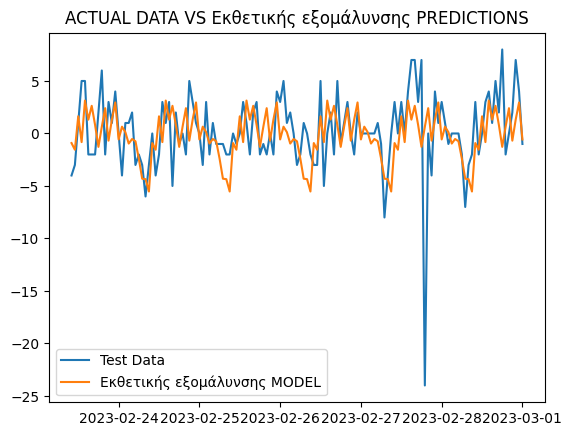

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
#exponential smoothing
seasonal_period = int(pd.Timedelta('1D') / pd.Timedelta(T))  # daily seasonality

exp_smoth_model2 = ExponentialSmoothing(training_data,seasonal="add",seasonal_periods = seasonal_period).fit(smoothing_level=0.2,optimized= True)
exp_smoth_pred2 =  exp_smoth_model2.predict(start = len(training_data), end = len(training_data)+len(test_data)-1)

#plot test data and ses model
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,exp_smoth_pred2,label = 'Εκθετικής εξομάλυνσης MODEL')
plt.legend()
plt.title("ACTUAL DATA VS Εκθετικής εξομάλυνσης PREDICTIONS")
plt.show()

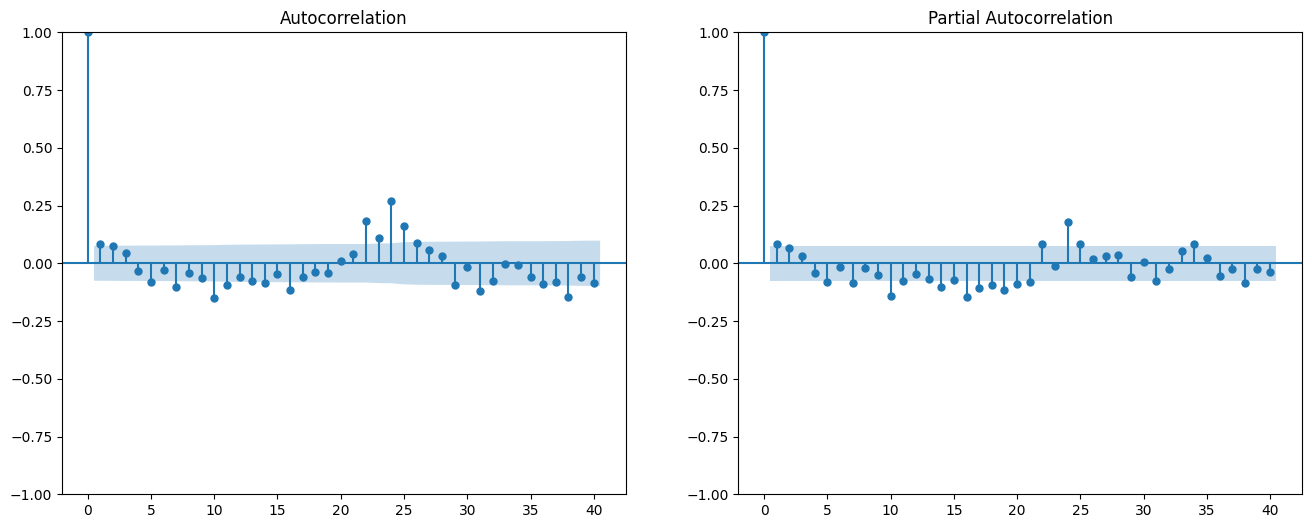

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot the diagrams acf & pacf
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(demand_series, lags=40, ax=axes[0])
plot_pacf(demand_series, lags=40, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


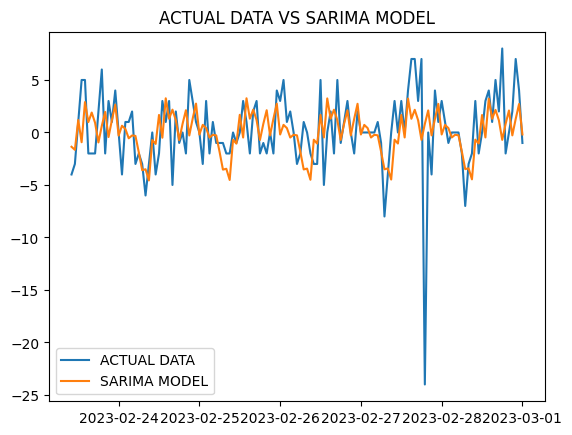

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# parameters for SARIMA from the analysis ACF/PACF
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1
s = 24  #Let us consider a seasonality of 24 hours (T= 1H each day is 24 hours)
#arima model
sarima_model2 =  SARIMAX(training_data, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_predictions2 = sarima_model2.predict(start=len(training_data),end= len(training_data)+len(test_data)-1, typ = 'levels')


#plot test data and arima model
plt.plot(test_data.index,test_data,label = 'ACTUAL DATA')
plt.plot(test_data.index,sarima_predictions2,label = 'SARIMA MODEL')
plt.legend()
plt.title("ACTUAL DATA VS SARIMA MODEL")
plt.show()

Best lag length based on AIC: 12


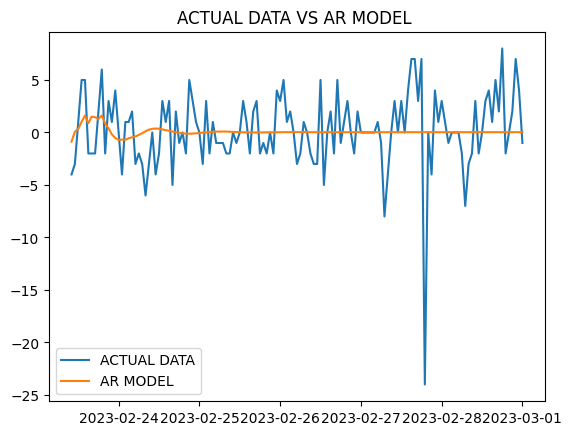

In [ ]:
from statsmodels.tsa.ar_model import AutoReg as AR
import numpy as np

#minimum aic -> best lag
aic_values = []
for lag in range(1, 13):
    model = AR(training_data, lags=lag).fit()
    aic_values.append(model.aic)

best_lag = np.argmin(aic_values) + 1
print(f"Best lag length based on AIC: {best_lag}")


# ΑR model with the best lag
best_model = AR(training_data, lags=best_lag).fit()
ar_1_model2 = best_model
ar_1_pred2 = ar_1_model2.predict(start =len(training_data), end = len(training_data)+len(test_data)-1,dynamic = False)

#plot ar_model and test data
plt.plot(test_data.index,test_data, label ="ACTUAL DATA")
plt.plot(test_data.index,ar_1_pred2,label= 'AR MODEL')
plt.legend()
plt.title("ACTUAL DATA VS AR MODEL ")
plt.show()


***NOW WE WILL CALCULATE THE RMSE,MAE,MSE MEASUREMENTS***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse_sarima2 = mean_squared_error(test_data,sarima_predictions2)
mae_sarima2 = mean_absolute_error(test_data,sarima_predictions2)
rmse_sarima2 = np.sqrt(mse_sarima2)


mse_ar_2 = mean_squared_error(test_data,ar_1_pred2)
mae_ar_2 = mean_absolute_error(test_data,ar_1_pred2)
rmse_ar_2 = np.sqrt(mse_ar_2)


exp_smoth_mse2 = mean_squared_error(test_data,exp_smoth_pred2)
exp_smoth_mae2 = mean_absolute_error(test_data,exp_smoth_pred2)
exp_smoth_rmse2 = np.sqrt(exp_smoth_mse2)




#NOW WE WILL DO FOR T=3H

In [ ]:
T = '3H'

#assign the results per period T to a new variable for the bikes they get
taken = data['StartStationId'].resample(T).sum()
taken

EndTimefixed
2023-02-01 00:00:00     3
2023-02-01 03:00:00     1
2023-02-01 06:00:00    36
2023-02-01 09:00:00    33
2023-02-01 12:00:00    19
                       ..
2023-02-28 12:00:00    19
2023-02-28 15:00:00    34
2023-02-28 18:00:00    37
2023-02-28 21:00:00    14
2023-03-01 00:00:00     1
Freq: 3H, Name: StartStationId, Length: 225, dtype: int64

In [ ]:
T = '3H'
returned = data['EndStationId'].resample(T).sum()
returned

EndTimefixed
2023-02-01 00:00:00     4
2023-02-01 03:00:00     1
2023-02-01 06:00:00    25
2023-02-01 09:00:00    24
2023-02-01 12:00:00    22
                       ..
2023-02-28 12:00:00    26
2023-02-28 15:00:00    42
2023-02-28 18:00:00    43
2023-02-28 21:00:00    27
2023-03-01 00:00:00     0
Freq: 3H, Name: EndStationId, Length: 225, dtype: int64

In [ ]:
demand_series = returned - taken

In [ ]:
demand_series.isnull().sum()

0


since we have no missing values ​​we will continue the process with the steps we took for T=2H


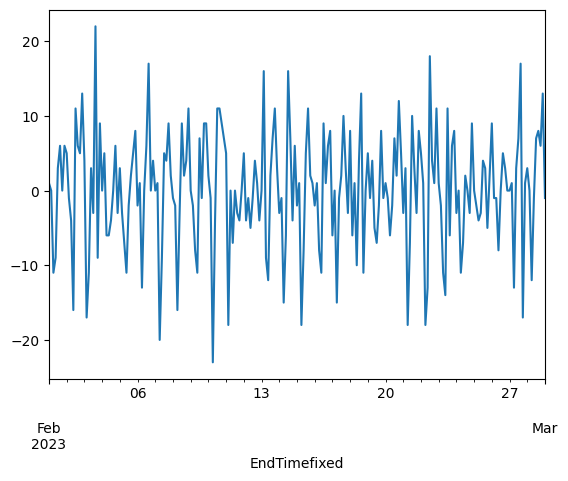

In [ ]:
import matplotlib.pyplot as plt



#plot το demand_series
demand_series.plot()
plt.show()

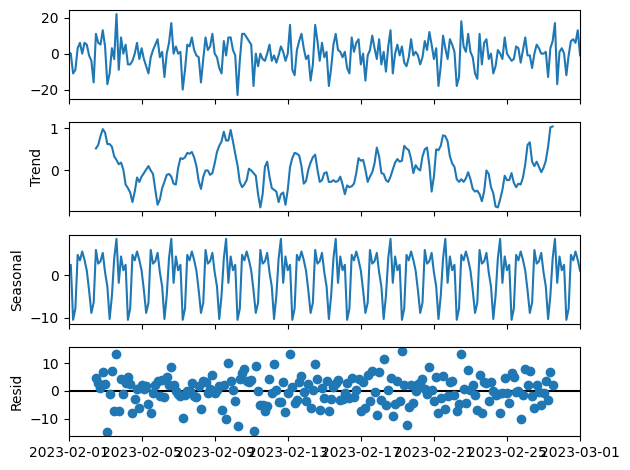

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(demand_series, model='additive')
result.plot()
plt.show()

**We will split our data into training data & test data (80,20)**

In [ ]:
# to split our data into training data & test data
from sklearn.model_selection import train_test_split

#we will split demand_series data into training_data & test data
training_data , test_data =  train_test_split(demand_series,test_size = 0.2 , shuffle = False)

#print the size of training_data & test_data

print(len(training_data))
print(len(test_data))

180
45


**WE WILL PROCEED WITH A VALIDITY CHECK OF OUR DATA**

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#stationarity testing
result = adfuller(training_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if not stationary the we differentiation
if result[1] > 0.05:
    training_data = training_data.diff()
else:
  print("The data are stationary")


ADF Statistic: -5.358647
p-value: 0.000004
The data are stationary


Now we will put our models (we will put them all together in one code)

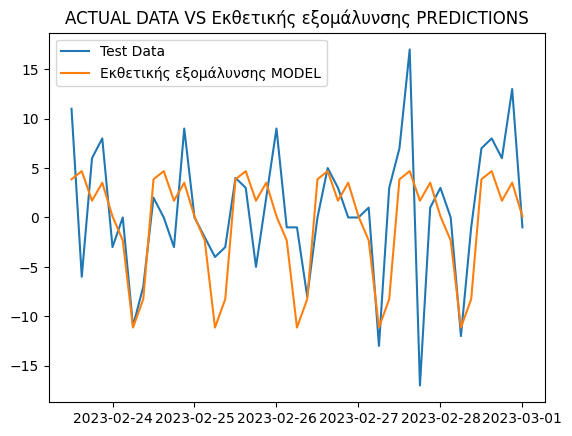

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
#exponential smoothing
seasonal_period = int(pd.Timedelta('1D') / pd.Timedelta(T))  # daily seasonality

exp_smoth_model3 = ExponentialSmoothing(training_data,seasonal="add",seasonal_periods = seasonal_period).fit(smoothing_level=0.2,optimized= True)
exp_smoth_pred3 =  exp_smoth_model3.predict(start = len(training_data), end = len(training_data)+len(test_data)-1)

#plot test data and ses model
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,exp_smoth_pred3,label = 'Εκθετικής εξομάλυνσης MODEL')
plt.legend()
plt.title("ACTUAL DATA VS Εκθετικής εξομάλυνσης PREDICTIONS")
plt.show()

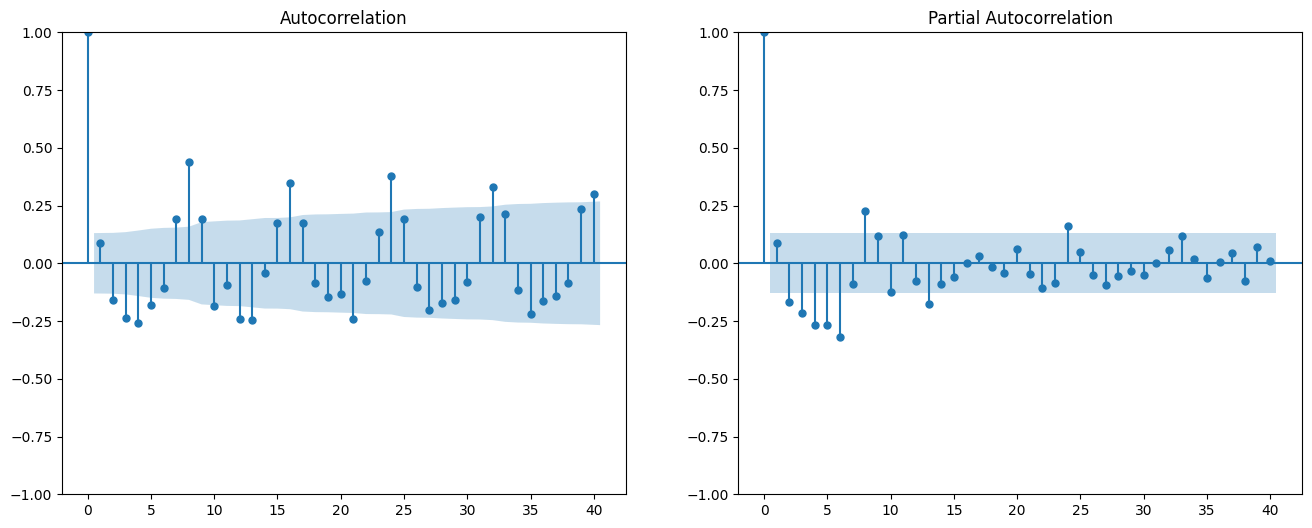

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot the diagrams acf & pacf
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(demand_series, lags=40, ax=axes[0])
plot_pacf(demand_series, lags=40, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


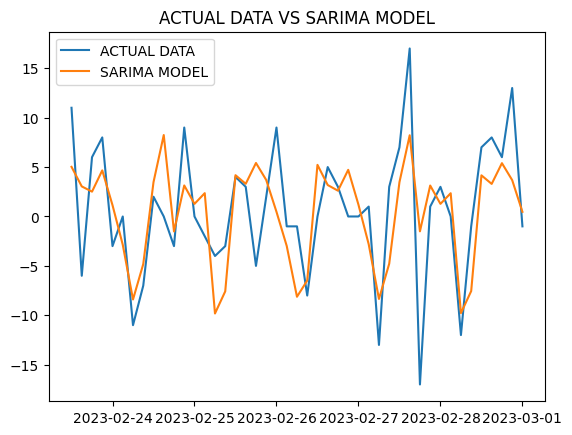

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# parameters for SARIMA from the analysis ACF/PACF
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1
s = 24  #Let us consider a seasonality of 24 hours (T= 1H each day is 24 hours)
#arima model
sarima_model3 =  SARIMAX(training_data, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_predictions3 = sarima_model3.predict(start=len(training_data),end= len(training_data)+len(test_data)-1, typ = 'levels')


#plot test data and arima model
plt.plot(test_data.index,test_data,label = 'ACTUAL DATA')
plt.plot(test_data.index,sarima_predictions3,label = 'SARIMA MODEL')
plt.legend()
plt.title("ACTUAL DATA VS SARIMA MODEL")
plt.show()

Best lag length based on AIC: 12


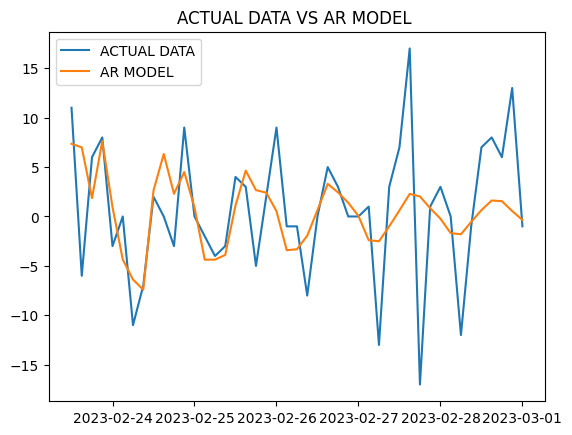

In [ ]:
from statsmodels.tsa.ar_model import AutoReg as AR
import numpy as np

#minimum aic -> best lag
aic_values = []
for lag in range(1, 13):
    model = AR(training_data, lags=lag).fit()
    aic_values.append(model.aic)

best_lag = np.argmin(aic_values) + 1
print(f"Best lag length based on AIC: {best_lag}")


# ΑR model with the best lag
best_model = AR(training_data, lags=best_lag).fit()
ar_1_model3 = best_model
ar_1_pred3 = ar_1_model3.predict(start =len(training_data), end = len(training_data)+len(test_data)-1,dynamic = False)

#plot ar_model and test data
plt.plot(test_data.index,test_data, label ="ACTUAL DATA")
plt.plot(test_data.index,ar_1_pred3,label= 'AR MODEL')
plt.legend()
plt.title("ACTUAL DATA VS AR MODEL ")
plt.show()


***NOW WE WILL CALCULATE THE RMSE,MAE,MSE MEASUREMENTS***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse_sarima3 = mean_squared_error(test_data,sarima_predictions3)
mae_sarima3 = mean_absolute_error(test_data,sarima_predictions3)
rmse_sarima3 = np.sqrt(mse_sarima3)


mse_ar_3 = mean_squared_error(test_data,ar_1_pred3)
mae_ar_3 = mean_absolute_error(test_data,ar_1_pred3)
rmse_ar_3 = np.sqrt(mse_ar_3)


exp_smoth_mse3 = mean_squared_error(test_data,exp_smoth_pred3)
exp_smoth_mae3 = mean_absolute_error(test_data,exp_smoth_pred3)
exp_smoth_rmse3 = np.sqrt(exp_smoth_mse3)




#NOW WE WILL DO FOR T=0.5H

In [ ]:
T = '0.5H'

#assign the results per period T to a new variable for the bikes they get
taken = data['StartStationId'].resample(T).sum()
taken

EndTimefixed
2023-02-01 00:30:00    3
2023-02-01 01:00:00    0
2023-02-01 01:30:00    0
2023-02-01 02:00:00    0
2023-02-01 02:30:00    0
                      ..
2023-02-28 22:00:00    0
2023-02-28 22:30:00    2
2023-02-28 23:00:00    3
2023-02-28 23:30:00    2
2023-03-01 00:00:00    1
Freq: 30T, Name: StartStationId, Length: 1344, dtype: int64

In [ ]:
T = '0.5H'
returned = data['EndStationId'].resample(T).sum()
returned

EndTimefixed
2023-02-01 00:30:00    0
2023-02-01 01:00:00    2
2023-02-01 01:30:00    1
2023-02-01 02:00:00    0
2023-02-01 02:30:00    1
                      ..
2023-02-28 22:00:00    4
2023-02-28 22:30:00    5
2023-02-28 23:00:00    2
2023-02-28 23:30:00    7
2023-03-01 00:00:00    0
Freq: 30T, Name: EndStationId, Length: 1344, dtype: int64

In [ ]:
demand_series = returned - taken

In [ ]:
demand_series.isnull().sum()

0


since we have no missing values ​​we will continue the process with the steps we took for T=2H


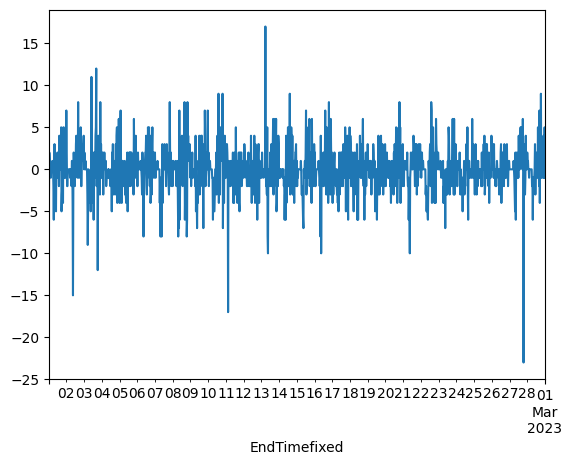

In [ ]:
import matplotlib.pyplot as plt



#plot το demand_series
demand_series.plot()
plt.show()

**We will split our data into training data & test data (80,20)**

In [ ]:
# to split our data into training data & test data
from sklearn.model_selection import train_test_split

#we will split demand_series data into training_data & test data
training_data , test_data =  train_test_split(demand_series,test_size = 0.2 , shuffle = False)

#print the size of training_data & test_data

print(len(training_data))
print(len(test_data))

1075
269


**WE WILL PROCEED WITH A VALIDITY CHECK OF OUR DATA**

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#stationarity testing
result = adfuller(training_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if not stationary the we differentiation
if result[1] > 0.05:
    training_data = training_data.diff()
else:
  print("The data are stationary")


ADF Statistic: -9.626641
p-value: 0.000000
The data are stationary


Now we will put our models (we will put them all together in one code)

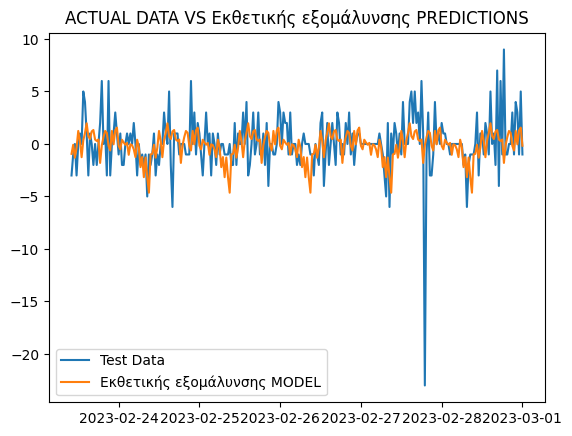

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
#exponential smoothing
seasonal_period = int(pd.Timedelta('1D') / pd.Timedelta(T))  # daily seasonality

exp_smoth_model05 = ExponentialSmoothing(training_data,seasonal="add",seasonal_periods = seasonal_period).fit(smoothing_level=0.2,optimized= True)
exp_smoth_pred05 =  exp_smoth_model05.predict(start = len(training_data), end = len(training_data)+len(test_data)-1)

#plot test data and ses model
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,exp_smoth_pred05,label = 'Εκθετικής εξομάλυνσης MODEL')
plt.legend()
plt.title("ACTUAL DATA VS Εκθετικής εξομάλυνσης PREDICTIONS")
plt.show()

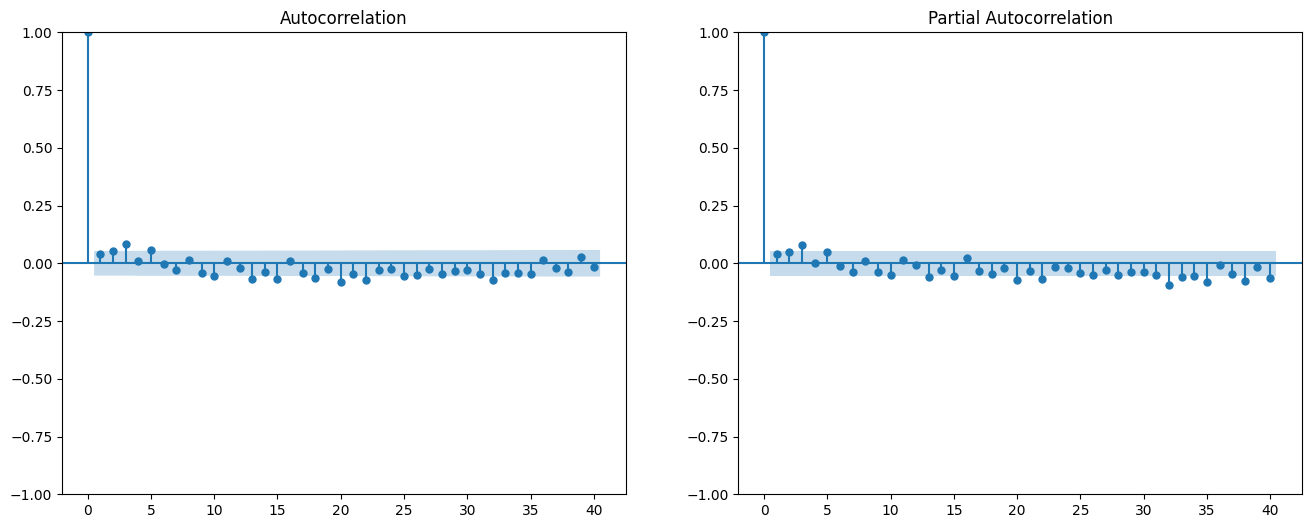

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot the diagrams acf & pacf
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(demand_series, lags=40, ax=axes[0])
plot_pacf(demand_series, lags=40, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


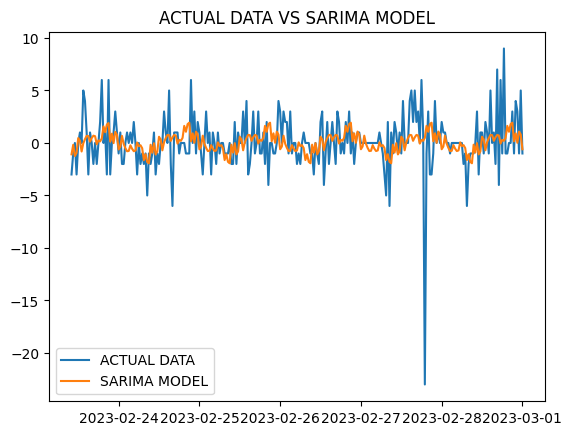

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# parameters for SARIMA from the analysis ACF/PACF
p = 2
d = 0
q = 1
P = 1
D = 0
Q = 1
s = 24  #Let us consider a seasonality of 24 hours (T= 1H each day is 24 hours)
#arima model
sarima_model05 =  SARIMAX(training_data, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_predictions05 = sarima_model05.predict(start=len(training_data),end= len(training_data)+len(test_data)-1, typ = 'levels')


#plot test data and arima model
plt.plot(test_data.index,test_data,label = 'ACTUAL DATA')
plt.plot(test_data.index,sarima_predictions05,label = 'SARIMA MODEL')
plt.legend()
plt.title("ACTUAL DATA VS SARIMA MODEL")
plt.show()

Best lag length based on AIC: 9


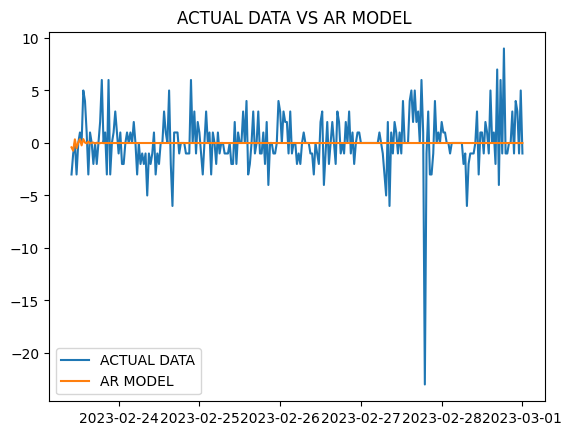

In [ ]:
from statsmodels.tsa.ar_model import AutoReg as AR
import numpy as np

#minimum aic -> best lag
aic_values = []
for lag in range(1, 10):
    model = AR(training_data, lags=lag).fit()
    aic_values.append(model.aic)

best_lag = np.argmin(aic_values) + 1
print(f"Best lag length based on AIC: {best_lag}")


# ΑR model with the best lag
best_model = AR(training_data, lags=best_lag).fit()
ar_1_model05 = best_model
ar_1_pred05 = ar_1_model05.predict(start =len(training_data), end = len(training_data)+len(test_data)-1,dynamic = False)

#plot ar_model and test data
plt.plot(test_data.index,test_data, label ="ACTUAL DATA")
plt.plot(test_data.index,ar_1_pred05,label= 'AR MODEL')
plt.legend()
plt.title("ACTUAL DATA VS AR MODEL ")
plt.show()


***NOW WE WILL CALCULATE THE RMSE,MAE,MSE MEASUREMENTS***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse_sarima05 = mean_squared_error(test_data,sarima_predictions05)
mae_sarima05= mean_absolute_error(test_data,sarima_predictions05)
rmse_sarima05 = np.sqrt(mse_sarima05)


mse_ar_05 = mean_squared_error(test_data,ar_1_pred05)
mae_ar_05 = mean_absolute_error(test_data,ar_1_pred05)
rmse_ar_05 = np.sqrt(mse_ar_05)


exp_smoth_mse05 = mean_squared_error(test_data,exp_smoth_pred05)
exp_smoth_mae05 = mean_absolute_error(test_data,exp_smoth_pred05)
exp_smoth_rmse05 = np.sqrt(exp_smoth_mse05)




# CONCLUSIONS

We are interested in RMSE, MAE, MSE because through them we will evaluate how reliable the models we used were (SARIMA, Exponential smoothing, AR1)

Comparing all 3 prediction methods
1. SARIMA MODEL
2. Exponential Smoothing
3. AR1 MODEL


It was observed that of the 3 methods, the best prediction was the one (for T=2H):

In [ ]:
#display of detailed data table T=2H
result ={
    "Prediction_methods":["Sarima","Εκθετικής Εξομάλυνσης","AR1"],
    "MAE":[mae_sarima,exp_smoth_mae,mae_ar_1],
    "MSE":[mse_sarima,exp_smoth_mse,mse_ar_1],
    "RMSE":[rmse_sarima,exp_smoth_rmse,rmse_ar_1]
}


#print the data
outputs = pd.DataFrame(result)
print(outputs)

#finding the minimum MAE
minimum = outputs['MAE'].min()
#finding the index of the minimum MAE
min_index = outputs['MAE'].idxmin()
min_method = outputs.loc[min_index,"Prediction_methods"]
#printing the best model
print(f"Το καλυτερο μοντελο ηταν το : {min_method}")


      Prediction_methods       MAE        MSE      RMSE
0                 Sarima  3.078661  16.277944  4.034593
1  Εκθετικής Εξομάλυνσης  3.234593  17.968818  4.238964
2                    AR1  3.261418  19.005746  4.359558
Το καλυτερο μοντελο ηταν το : Sarima




It was observed that of the 3 methods, the best prediction was the one (for T=1H):

In [ ]:
#display of detailed data table T=1H
results={
    "Prediction_methods":["Sarima","Εκθετικής Εξομάλυνσης","AR1"],
    "MAE":[mae_sarima2,exp_smoth_mae2,mae_ar_2],
    "MSE":[mse_sarima2,exp_smoth_mse2,mse_ar_2],
    "RMSE":[rmse_sarima2,exp_smoth_rmse2,rmse_ar_2,]
}

#print the data
outputs2 = pd.DataFrame(results)
print(outputs2)

#finding the minimum MAE
minimum2 = outputs2['MAE'].min()
#finding the index with the minimum MAE
min_index2 = outputs2['MAE'].idxmin()
min_method2 = outputs2.loc[min_index2,"Prediction_methods"]
#find the best prediction model
print(f"Το καλυτερο μοντελο ηταν το : {min_method2}")

      Prediction_methods       MAE        MSE      RMSE
0                 Sarima  2.342967  12.220616  3.495800
1  Εκθετικής Εξομάλυνσης  2.500214  13.010986  3.607074
2                    AR1  2.490568  13.101037  3.619536
Το καλυτερο μοντελο ηταν το : Sarima


In [ ]:
results={
    "Prediction_methods":["Sarima","Εκθετικής Εξομάλυνσης","AR1"],
    "MAE":[mae_sarima3,exp_smoth_mae3,mae_ar_3],
    "MSE":[mse_sarima3,exp_smoth_mse3,mse_ar_3],
    "RMSE":[rmse_sarima3,exp_smoth_rmse3,rmse_ar_3,]
}

#print the data
outputs3 = pd.DataFrame(results)
print(outputs3)

#finding the minimum MAE
minimum3 = outputs3['MAE'].min()
#finding the index with the minimum MAE
min_index3 = outputs3['MAE'].idxmin()
min_method3 = outputs3.loc[min_index3,"Prediction_methods"]
#find the best prediction model
print(f"Το καλυτερο μοντελο ηταν το : {min_method3}")

      Prediction_methods       MAE        MSE      RMSE
0                 Sarima  4.217357  28.051597  5.296376
1  Εκθετικής Εξομάλυνσης  4.234276  33.239897  5.765405
2                    AR1  4.355312  37.271253  6.105019
Το καλυτερο μοντελο ηταν το : Sarima


In [ ]:
results={
    "Prediction_methods":["Sarima","Εκθετικής Εξομάλυνσης","AR1"],
    "MAE":[mae_sarima05,exp_smoth_mae05,mae_ar_05],
    "MSE":[mse_sarima05,exp_smoth_mse05,mse_ar_05],
    "RMSE":[rmse_sarima05,exp_smoth_rmse05,rmse_ar_05,]
}

#print the data
outputs05 = pd.DataFrame(results)
print(outputs05)

#finding the minimum MAE
minimum05 = outputs05['MAE'].min()
#finding the index with the minimum MAE
min_index05 = outputs05['MAE'].idxmin()
min_method05 = outputs05.loc[min_index05,"Prediction_methods"]
#find the best prediction model
print(f"Το καλυτερο μοντελο ηταν το : {min_method05}")

      Prediction_methods       MAE       MSE      RMSE
0                 Sarima  1.743364  6.904688  2.627677
1  Εκθετικής Εξομάλυνσης  1.794917  7.154378  2.674767
2                    AR1  1.620054  6.877710  2.622539
Το καλυτερο μοντελο ηταν το : AR1


NOW TO CHOOSE WHICH PERIOD WAS THE MOST APPROPRIATE WE WILL COMPARE THE PRICES OF THE TWO BEST MODELS

In [ ]:
best_model = __builtins__.min([(minimum05, "min_method05", "0.5H"), (minimum, "min_method", "1H"), (minimum3, "min_method3", "3H"), (minimum2, "min_method2", "2H")])
print(f"The best model was : {best_model[1]} with time period T = {best_model[2]}")


The best model was : min_method05 with time period T = 0.5H


**The best model for the time period T=2H was the SARIMA model**

  **The best model for the time period T=1H was the SARIMA model**

  **IT WAS ALSO OBSERVED THAT THE BEST MAE, RMSE HAD THE TIME PERIOD T= 1H**

# EXPLANATION


As observed, we had the best forecasts for the time period T = 1H

This is normal because the values ​​are more likely to be more accurate and stable than those of T = 2H

to better understand this we will see it with these 2 plots

Outliers T=2H:
15


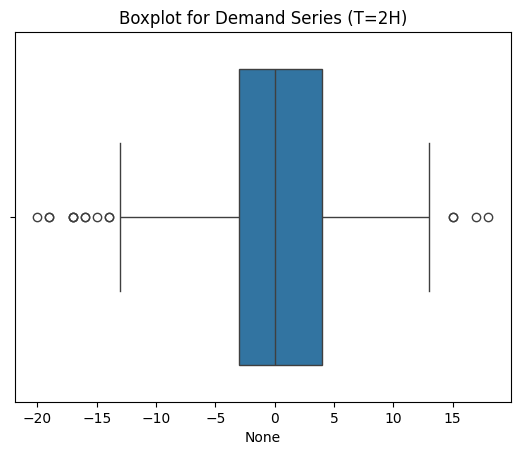

Outliers T=1H:
36


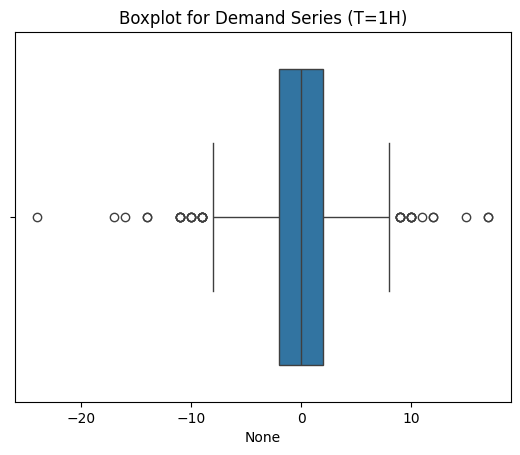

Outliers T=3H:
7


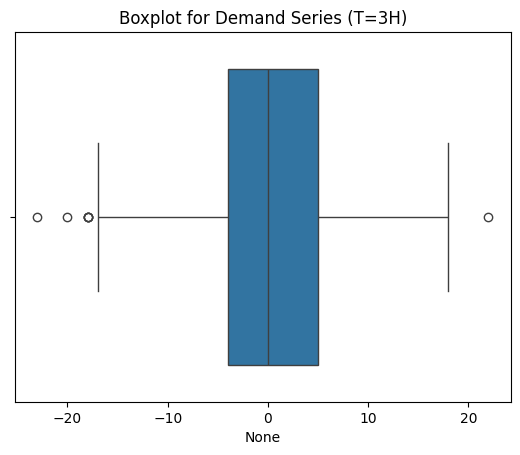

Outliers T=0.5H:
136


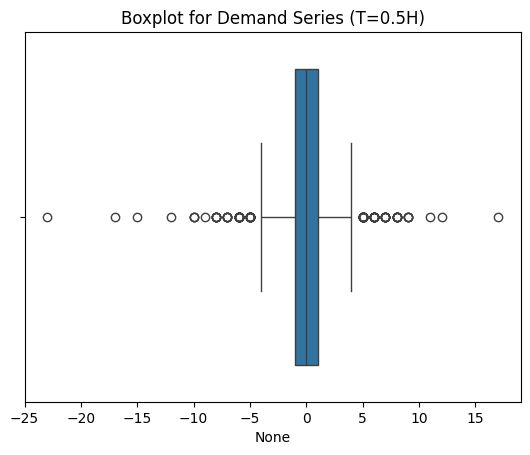

  Period  Outliers
0   0.5H       136
1     1H        36
2     2H        15
3     3H         7
Best Period is : 3H
Least outliers : 7


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Period T = '2H'
T = '2H'
taken_2H = data['StartStationId'].resample(T).sum()
returned_2H = data['EndStationId'].resample(T).sum()
demand_series_2H = returned_2H - taken_2H

# Finding outliers for T=2H
Q1_2 = demand_series_2H.quantile(0.25)
Q3_2 = demand_series_2H.quantile(0.75)
IQR_2 = Q3_2 - Q1_2
lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

outliers_2H = demand_series_2H[(demand_series_2H < lower_bound_2) | (demand_series_2H > upper_bound_2)]
outliers_count_2H = outliers_2H.count()
print("Outliers T=2H:")
print(outliers_count_2H)

sns.boxplot(x=demand_series_2H)
plt.title('Boxplot for Demand Series (T=2H)')
plt.show()

# Period T = '1H'
T = '1H'
taken_1H = data['StartStationId'].resample(T).sum()
returned_1H = data['EndStationId'].resample(T).sum()
demand_series_1H = returned_1H - taken_1H

# Finding outliers for T=1H
Q1 = demand_series_1H.quantile(0.25)
Q3 = demand_series_1H.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_1H = demand_series_1H[(demand_series_1H < lower_bound) | (demand_series_1H > upper_bound)]
outliers_count_1H = outliers_1H.count()
print("Outliers T=1H:")
print(outliers_count_1H)

sns.boxplot(x=demand_series_1H)
plt.title('Boxplot for Demand Series (T=1H)')
plt.show()

# Period T = '3H'
T = '3H'
taken_3H = data['StartStationId'].resample(T).sum()
returned_3H = data['EndStationId'].resample(T).sum()
demand_series_3H = returned_3H - taken_3H

# Finding outliers for T=3H
Q1_3 = demand_series_3H.quantile(0.25)
Q3_3 = demand_series_3H.quantile(0.75)
IQR_3 = Q3_3 - Q1_3
lower_bound_3 = Q1_3 - 1.5 * IQR_3
upper_bound_3 = Q3_3 + 1.5 * IQR_3

outliers_3H = demand_series_3H[(demand_series_3H < lower_bound_3) | (demand_series_3H > upper_bound_3)]
outliers_count_3H = outliers_3H.count()
print("Outliers T=3H:")
print(outliers_count_3H)

sns.boxplot(x=demand_series_3H)
plt.title('Boxplot for Demand Series (T=3H)')
plt.show()

# Period T = '0.5H'
T = '0.5H'
taken_05H = data['StartStationId'].resample(T).sum()
returned_05H = data['EndStationId'].resample(T).sum()
demand_series_05H = returned_05H - taken_05H

# Finding outliers for T=0.5H
Q1_05 = demand_series_05H.quantile(0.25)
Q3_05 = demand_series_05H.quantile(0.75)
IQR_05 = Q3_05 - Q1_05
lower_bound_05 = Q1_05 - 1.5 * IQR_05
upper_bound_05 = Q3_05 + 1.5 * IQR_05

outliers_05H = demand_series_05H[(demand_series_05H < lower_bound_05) | (demand_series_05H > upper_bound_05)]
outliers_count_05H = outliers_05H.count()
print("Outliers T=0.5H:")
print(outliers_count_05H)

sns.boxplot(x=demand_series_05H)
plt.title('Boxplot for Demand Series (T=0.5H)')
plt.show()

# Summary of outliers for each period
arr_outliers = {
    "Period": ["0.5H", "1H", "2H", "3H"],
    "Outliers": [outliers_count_05H, outliers_count_1H, outliers_count_2H, outliers_count_3H]
}

arr_outliers = pd.DataFrame(arr_outliers)
min_outliers = arr_outliers["Outliers"].min()
minidx = arr_outliers["Outliers"].idxmin()
best_time = arr_outliers.loc[minidx, "Period"]
print(arr_outliers)
print(f"Best Period is : {best_time}")
print(f"Least outliers : {min_outliers}")


Data Aggregation:

Shorter Period (0.5H): When resampling over shorter periods, you are aggregating less data into each bin. This can result in more variability and a higher likelihood of detecting extreme values as outliers.
Longer Period (3H): When resampling over longer periods, more data points are aggregated into each bin, which can smooth out extreme values and reduce variability. This makes it less likely for any particular value to be considered an outlier.
Interquartile Range (IQR) Sensitivity:

The IQR is calculated based on the 25th and 75th percentiles. When the data is more variable (as with shorter periods), the IQR can become narrower, making it easier for values to fall outside the 1.5*IQR bounds.
With longer periods, the IQR tends to be wider due to the aggregation of more data points, making it harder for values to be classified as outliers.